In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Ex2.xlsx", sheet_name="Sheet2")
df.head()

,Name,Gender,Age,Experience,Designation,Q1,Q2,Q3,Q4,Q5,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Bars,HCRI
0,Liam,Male,37,1,Producer,3,2,5,1,1,...,1,3,2,2,3,3,3,1,4,70.0
1,Olivia,Female,48,13,Cinematographer (Director of Photography),2,4,5,4,1,...,5,1,1,4,3,3,3,5,3,62.5
2,Noah,Male,24,8,Director,5,3,5,4,1,...,4,1,1,1,5,3,1,2,1,70.0
3,Emma,Female,56,10,Editor,1,1,5,4,2,...,4,3,2,1,1,5,4,5,1,50.0
4,Ava,Female,42,14,Art Director,1,4,2,4,5,...,4,2,2,2,2,3,3,3,1,55.0


In [3]:
df2=df[["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10","Q11","Q12","Q13","Q14","Q15","Q16","Q17","Q18","Q19","Q20","Q21","Q22","Q23","Q24",]]
df2.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24
0,3,2,5,1,1,4,3,2,1,3,...,2,2,1,3,2,2,3,3,3,1
1,2,4,5,4,1,1,3,5,2,5,...,2,3,5,1,1,4,3,3,3,5
2,5,3,5,4,1,3,4,4,4,4,...,5,4,4,1,1,1,5,3,1,2
3,1,1,5,4,2,4,5,5,1,2,...,3,2,4,3,2,1,1,5,4,5
4,1,4,2,4,5,2,1,5,2,5,...,2,5,4,2,2,2,2,3,3,3


In [4]:
df2.dtypes

Q1     int64
Q2     int64
Q3     int64
Q4     int64
Q5     int64
Q6     int64
Q7     int64
Q8     int64
Q9     int64
Q10    int64
Q11    int64
Q12    int64
Q13    int64
Q14    int64
Q15    int64
Q16    int64
Q17    int64
Q18    int64
Q19    int64
Q20    int64
Q21    int64
Q22    int64
Q23    int64
Q24    int64
dtype: object

In [5]:
df2.isnull().sum()

Q1     0
Q2     0
Q3     0
Q4     0
Q5     0
Q6     0
Q7     0
Q8     0
Q9     0
Q10    0
Q11    0
Q12    0
Q13    0
Q14    0
Q15    0
Q16    0
Q17    0
Q18    0
Q19    0
Q20    0
Q21    0
Q22    0
Q23    0
Q24    0
dtype: int64

In [6]:
correlation=df2.corr()

<Axes: >

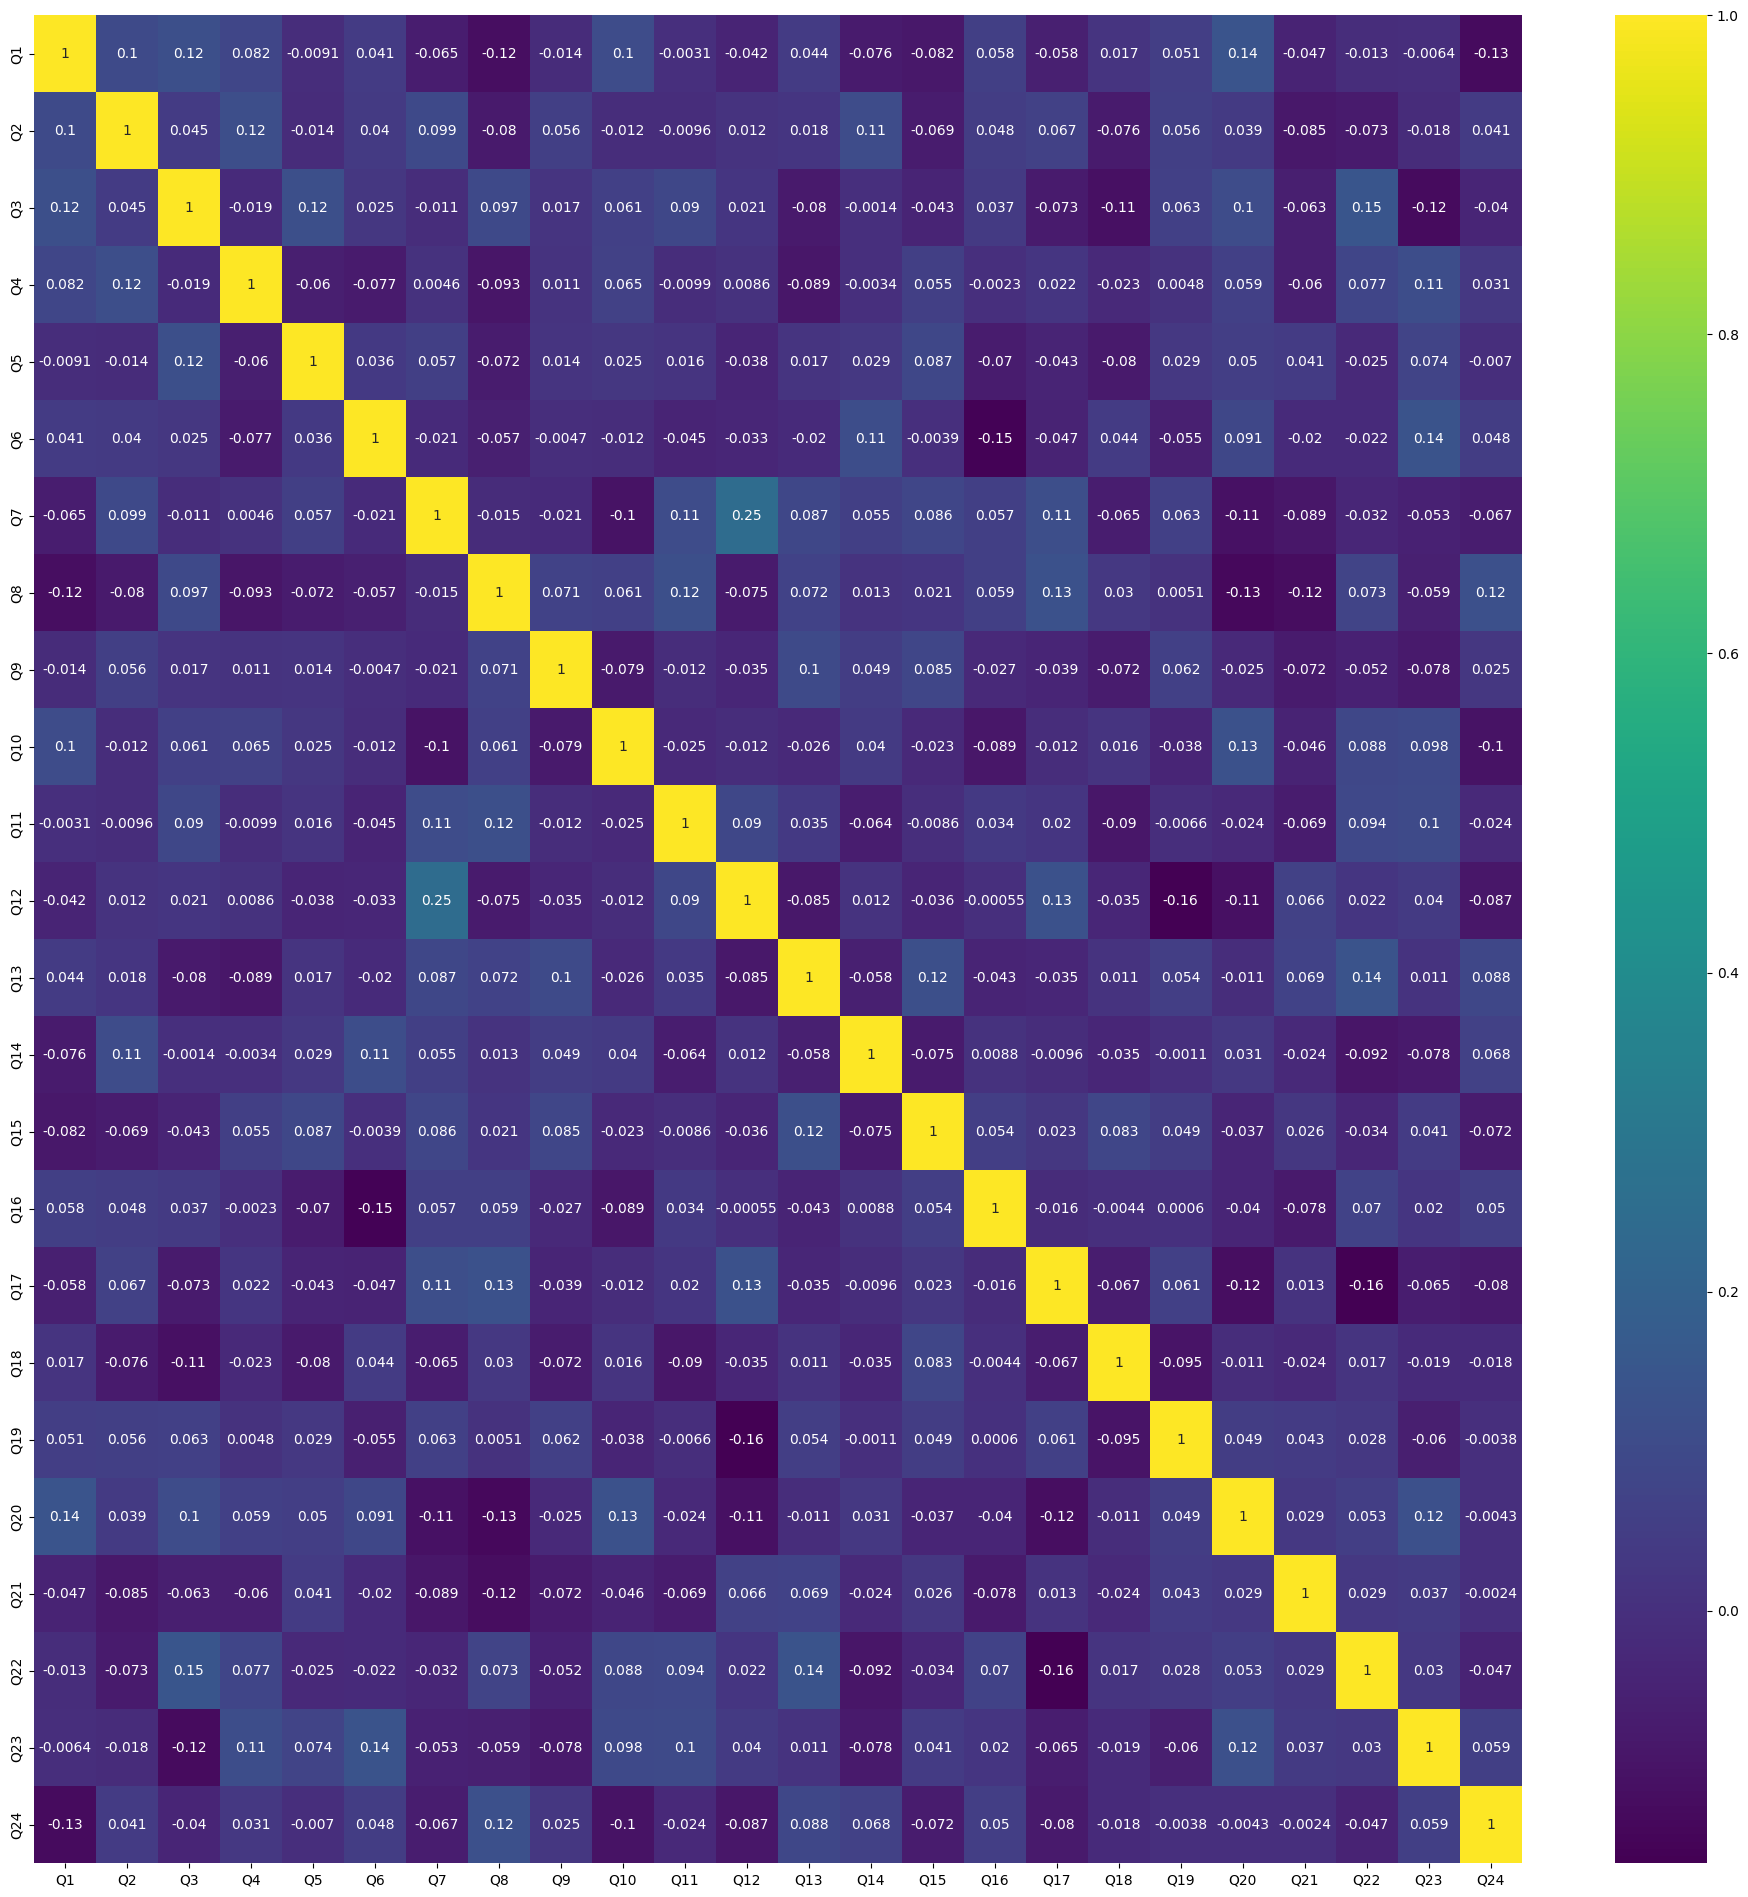

In [7]:
plt.figure(figsize=(24,24))
sns.heatmap(correlation,annot=True,cmap='viridis')

In [8]:
columns = [df2.columns[i:i + 6] for i in range(0, len(df2.columns), 4)]

sum=[]
for column in columns:
    sum.append((df2[column]).sum(axis=1))

new_column=pd.concat(sum,axis=1)
new_column.columns = ["Working Conditions", "Relationship Between Colleagues", "Job Satisfaction", "Company Policy", "Rewards and Awards", "Work Load"]

data = new_column
data.head()

,Working Conditions,Relationship Between Colleagues,Job Satisfaction,Company Policy,Rewards and Awards,Work Load
0,16,14,21,15,14,10
1,17,17,23,18,17,14
2,21,20,17,17,15,11
3,17,19,18,19,16,15
4,18,20,19,19,15,11


C:\Users\sudee\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sudee\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sudee\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sudee\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

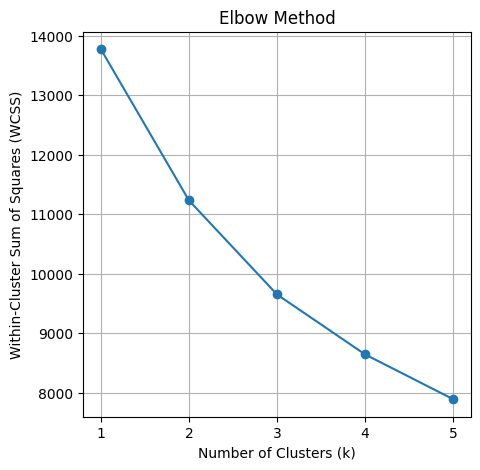

In [9]:
from sklearn.cluster import KMeans
wcss = []

# Define a range of k values to test
k_values = range(1,6)

# Calculate WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to identify the elbow point
plt.figure(figsize=(5, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

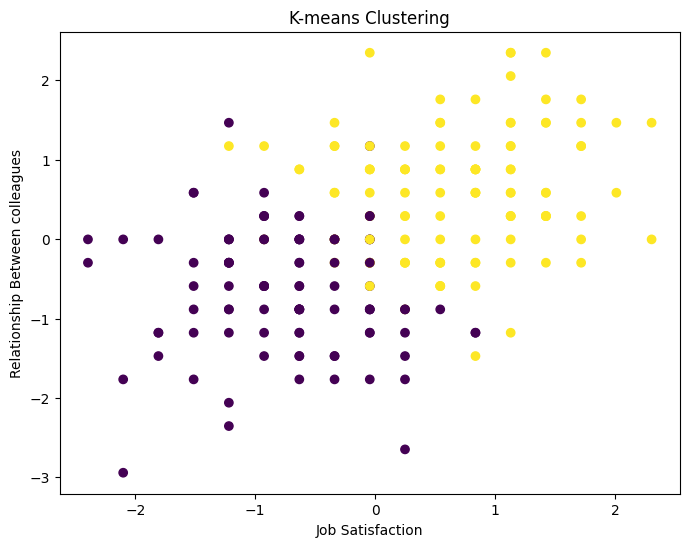

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled= scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled, columns=data.columns)
scaled_df.head()
k_opt=2
model = KMeans(n_clusters=k_opt,random_state =42,n_init=20)
model.fit(scaled_df)

scaled_df['labels'] = model.labels_
cluster_centers = model.cluster_centers_


plt.figure(figsize=(8, 6))
plt.scatter(scaled_df['Job Satisfaction'], scaled_df['Relationship Between Colleagues'] , c=scaled_df['labels'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Job Satisfaction')
plt.ylabel('Relationship Between colleagues')


plt.show()

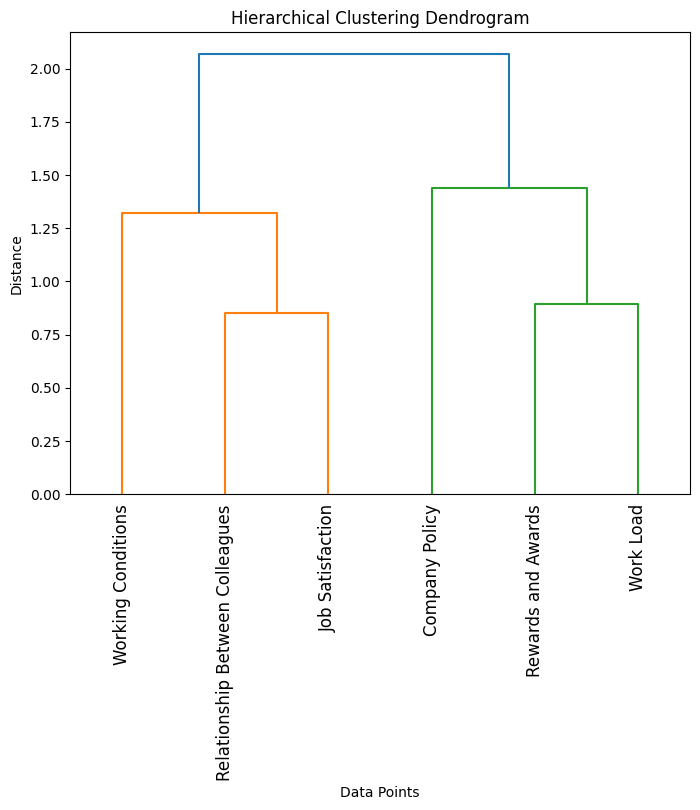

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram
corr2=data.corr()

# Perform hierarchical clustering
linkage_matrix = linkage(corr2, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, labels=corr2.index, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.xticks(rotation=90)
plt.ylabel('Distance')
plt.show()

In [12]:
data['Score']=data.iloc[:,0:6].sum(axis=1)
mean=int(data['Score'].mean())
data.loc[data['Score'] >= mean, 'Satisfaction'] = 'High'
data.loc[data['Score'] < mean, 'Satisfaction'] = 'Low'
count=data["Satisfaction"].value_counts()
print(count)


Satisfaction
High    111
Low      89
Name: count, dtype: int64


In [13]:

data2=df[['Name', 'Age','Gender' ,'Experience', 'Designation']].join(data)
data2['Designation'].groupby(data2['Satisfaction']).max()
data2['Age'].groupby(data2['Satisfaction']).max()


Satisfaction
High    60
Low     60
Name: Age, dtype: int64

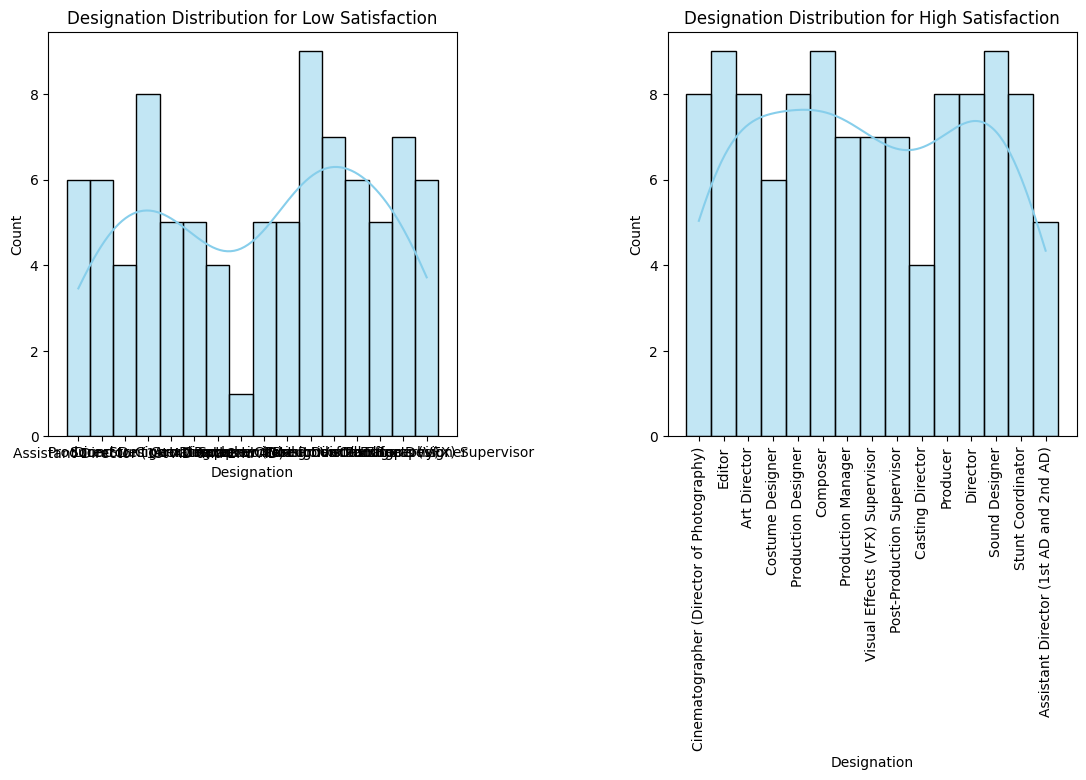

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, satisfaction_group in enumerate(data['Satisfaction'].unique()):
    data3 = data2[data2['Satisfaction'] == satisfaction_group]['Designation']
    sns.histplot(data3, bins=15, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Designation Distribution for {satisfaction_group} Satisfaction')
    axes[i].set_xlabel('Designation')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()